In [1]:
import numpy as np
import pandas as pd

In [50]:
def is_win():
    
    floor = 0
    up_times = 0
    
    while up_times < 100:
        dice = np.random.randint(1, 7, 1)[0]
        
        if dice in [1, 2]:
            floor = max(0, floor - 1)
            
        elif dice in [3, 5]:
            floor = floor + 1
            up_times += 1
            
        else:
            floor = floor + np.random.randint(1, 7, 1)[0]
            up_times += 1
            
        if np.random.uniform(size=1) <= 0.001:
            floor = 0
        
        # if floor >= 60: ->
        #     break
        
    return floor >= 60

In [51]:
num_play = 10000
win_times = []

for i in range(num_play):
    win_times.append(is_win())

print(f'Winning rate: {sum(win_times) / num_play}')

Winning rate: 0.9476


### Assigment 3

In [52]:
from glob import glob

In [55]:
paths = '../Assignments/Session_10/Names/*.txt'
file_paths = sorted(glob(paths))

li = []
for path in file_paths:
    df = pd.read_csv(path, names=['name', 'gender', 'occurrence'])
    df['year'] = int(path[-8:-4])
    li.append(df)
    
final_df = pd.concat(li, ignore_index=True)

In [56]:
final_df.head(2)

,name,gender,occurrence,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880


In [57]:
final_df.shape

(1957046, 4)

#### Vẽ biểu đồ tổng số trẻ em sinh ra theo giới tính và năm (Total births by sex and year)

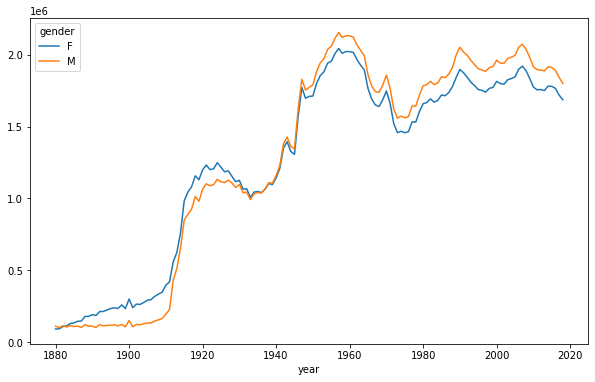

In [68]:
final_df.groupby(['year', 'gender']).occurrence.sum().unstack().plot(figsize=(10, 6));

#### Tạo subset gồm top 1000 cái tên phổ biến mỗi năm theo từng loại giới tính

In [71]:
final_df.groupby(['year', 'gender']).apply(lambda x : x[['name', 'occurrence']].nlargest(1000, 'occurrence', keep='all')).droplevel(-1)

name  occurrence
year gender                       
1880 F            Mary        7065
     F            Anna        2604
     F            Emma        2003
     F       Elizabeth        1939
     F          Minnie        1746
...                ...         ...
2018 M          Korbyn         207
     M         Randall         207
     M          Benton         206
     M         Coleman         206
     M          Markus         206

[281378 rows x 2 columns]

In [89]:
final_df.groupby(['year', 'gender']).apply(lambda x : x[['name', 'occurrence']].nlargest(1000, 'occurrence', keep='all')).droplevel(-1)

name  occurrence
year gender                       
1880 F            Mary        7065
     F            Anna        2604
     F            Emma        2003
     F       Elizabeth        1939
     F          Minnie        1746
...                ...         ...
2018 M          Korbyn         207
     M         Randall         207
     M          Benton         206
     M         Coleman         206
     M          Markus         206

[281378 rows x 2 columns]

In [94]:
top_1000 = final_df.groupby(['gender','year']).head(1000)

In [87]:
final_df.sort_values(['year', 'gender', 'occurrence'], ascending=[True, True, False]).groupby(['gender','year']).head(1000)

,name,gender,occurrence,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1944037,Korbyn,M,207,2018
1944038,Randall,M,207,2018
1944039,Benton,M,206,2018
1944040,Coleman,M,206,2018


#### Vẽ biểu đồ số lượng các bé sinh theo năm có các tên sau: Philip, Harry, Elizabeth, Marilyn

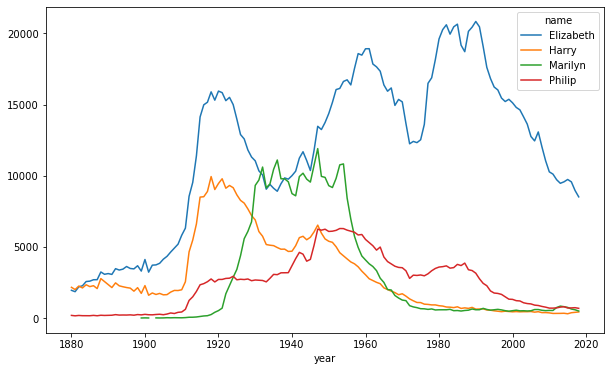

In [93]:
names = ['Philip', 'Harry', 'Elizabeth', 'Marilyn']
final_df.query('name in @names').groupby(['year', 'name']).occurrence.sum().unstack().plot(figsize=(10, 6));

#### Vẽ biểu đồ thể hiện sự đa dạng trong việc đặt tên qua các năm theo từng giới tính (thể hiện bằng xu hướng giảm dần từng năm của tổng tỷ lệ % của top 1000 tên phổ biến)

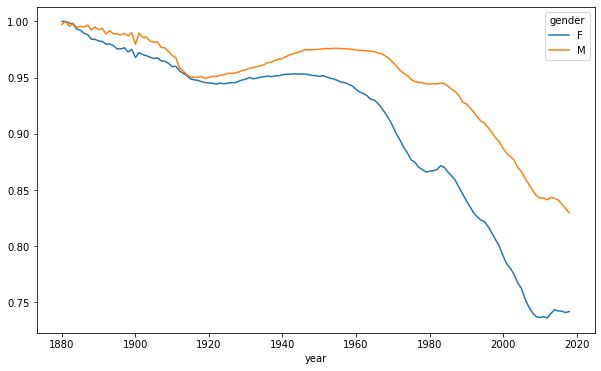

In [100]:
(top_1000.groupby(['year', 'gender']).occurrence.sum() / final_df.groupby(['year', 'gender']).occurrence.sum()).unstack().plot(figsize=(10, 6));

#### Vẽ biểu đồ thể hiện sự thay đổi trong cách đặt chữ cái đầu tiên trong tên của nam và nữ qua các năm 1900, 1960 và 2018

In [102]:
first_letter_df = final_df.query("year in [1900, 1960, 2018]")
first_letter_df['first_letter'] = first_letter_df.name.apply(lambda x : x[0])
first_letter_df

/var/folders/gz/lv0hp6ln3nl2kh1_srnkx7y00000gn/T/ipykernel_7149/1870620954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_letter_df['first_letter'] = first_letter_df.name.apply(lambda x : x[0])


,name,gender,occurrence,year,first_letter
52265,Mary,F,16706,1900,M
52266,Helen,F,6343,1900,H
52267,Anna,F,6114,1900,A
52268,Margaret,F,5304,1900,M
52269,Ruth,F,4765,1900,R
...,...,...,...,...,...
1957041,Zylas,M,5,2018,Z
1957042,Zyran,M,5,2018,Z
1957043,Zyrie,M,5,2018,Z
1957044,Zyron,M,5,2018,Z


In [104]:
import matplotlib.pyplot as plt

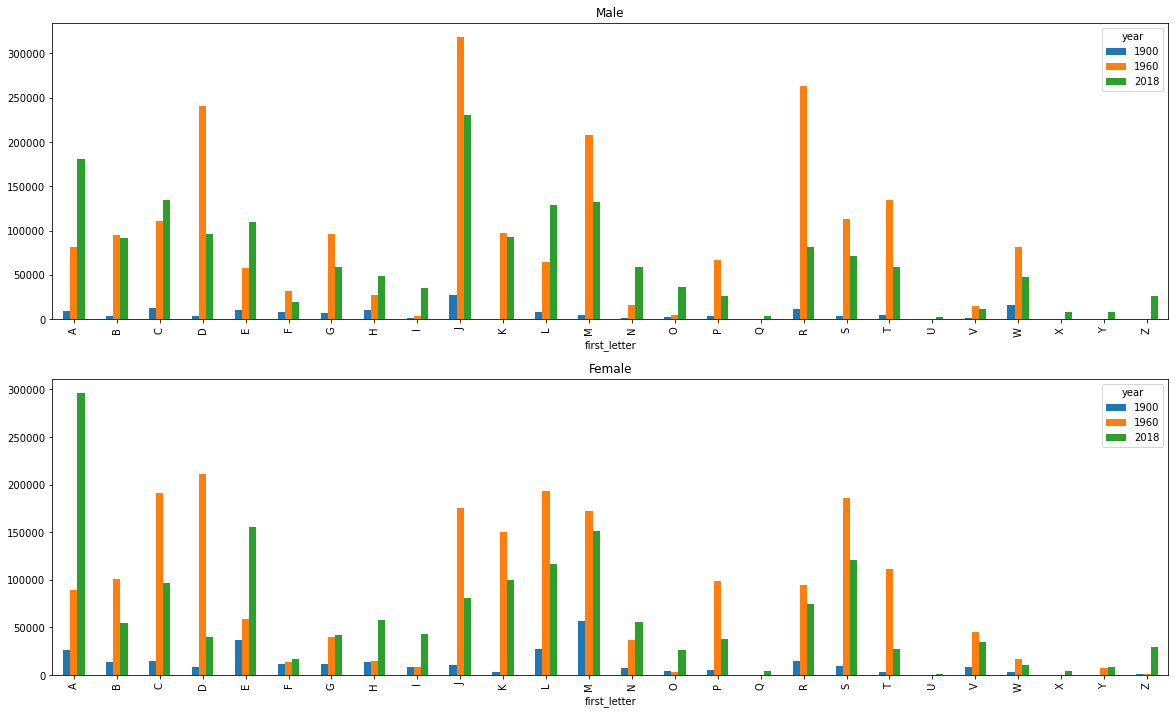

In [107]:
fig, ax = plt.subplots(2, 1, figsize=(20, 12))

first_letter_df.query("gender == 'M'").groupby(['first_letter', 'year']).occurrence.sum().unstack().plot(kind='bar', ax=ax[0], title='Male')
first_letter_df.query("gender == 'F'").groupby(['first_letter', 'year']).occurrence.sum().unstack().plot(kind='bar', ax=ax[1], title='Female');

####  Xác định xu hướng tên con trai biến thành tên con gái và ngược lại. Lấy ví dụ tên có chữ “Lesl...” Ban đầu nam đặt nhiều sau đó giảm, nữ ngược lại.

In [108]:
male_df = final_df.query("gender == 'M'")
female_df = final_df.query("gender == 'F'")

male_to_female_df = male_df.query("name in @female_df.name")
female_to_male_df = female_df.query("name in @male_df.name")

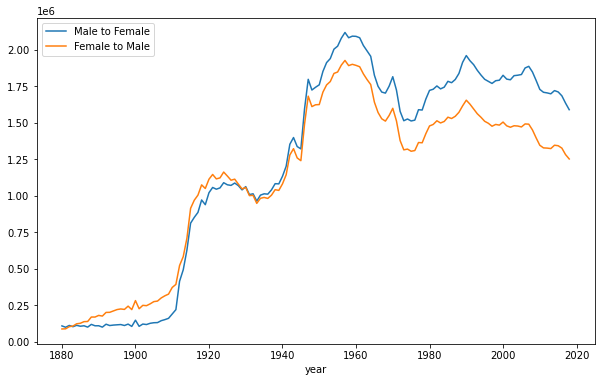

In [114]:
ax = plt.axes()
male_to_female_df.groupby('year').occurrence.sum().plot(ax=ax, figsize=(10, 6), label='Male to Female')
female_to_male_df.groupby('year').occurrence.sum().plot(ax=ax, label='Female to Male')
plt.legend(loc='upper left');